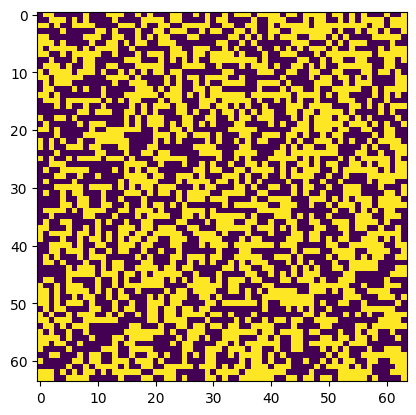

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.choice([-1, 1], size = (64, 64))
plt.imshow(data)

In [21]:
from scipy.signal import correlate
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def energy(data, j = 1, h = 1, boundary_cond = 'zeros'):
  magn_energy = -h * np.sum(data)
  int_energy = 0
  mask = np.array([[0, 1, 0], 
                   [1, 0, 1], 
                   [0, 1, 0]])
  if boundary_cond == 'zeros':
    int_energy = np.sum( - j * data * correlate(np.pad(data, 1, pad_with), mask, mode='valid'))
  return magn_energy + int_energy

test = np.array([[1, 2], [3, 4]])
energy(test, j = np.array([[1, 1], [2, 2]]),h = 0)

-85

In [31]:
ind = np.array([1, 1])
i, j = ind
opt_data = np.pad(test, 1, pad_with)
opt_data[]

array([[0, 0, 0, 0],
       [0, 1, 2, 0],
       [0, 3, 4, 0],
       [0, 0, 0, 0]])

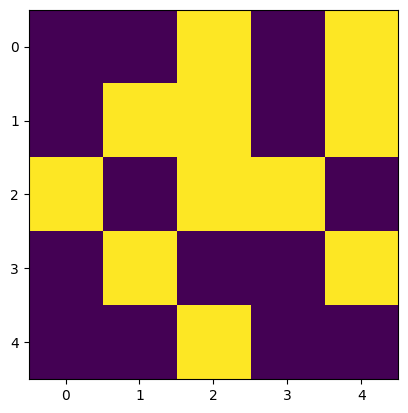

In [56]:
def metropolis(data, j, h):
  energy_log = []
  temperature = 3
  acceptance = 0.9
  opt_data= data.copy()
  cnt = 10
  for _ in range(1000):

    row, col = np.random.randint(low = 0, high=data.shape[0] - 1, size=(2,))
    opt_data_local = np.pad(opt_data, 1, pad_with)[row :row + 3, col:col + 3]
    opt_data_cand = np.pad(opt_data, 1, pad_with)[row:row + 3, col: col + 3]
    # print(opt_data_cand)
    opt_data_cand[1, 1] = -opt_data_cand[1, 1]
    delta_energy =energy(opt_data_cand, j, h) - energy(opt_data_local, j, h) 
    if delta_energy <= 0:
      opt_data[row, col] = -opt_data[row, col]
      cnt = 10
    else: 
      cnt-=1
      if np.exp(-delta_energy/temperature) > acceptance:
        opt_data[row, col] = -opt_data[row, col]
    energy_log.append(energy(opt_data, j, h))
    if cnt == 0:
      break
  return opt_data, energy_log
    
data = np.random.choice([-1, 1], size = (5, 5))
opt_data, log = metropolis(data, 1, h = 0)

plt.imshow(data)

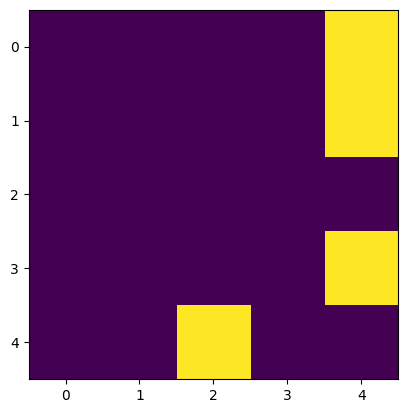

In [57]:
plt.imshow(opt_data)